 # Digit recognizer model on MNIST dataset

### Importing the required modules

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

### Loading the dataset

In [15]:
mnist = tf.keras.datasets.mnist

### Creating training and testing data

In [16]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

### Normalzing the data

In [17]:
X_train = tf.keras.utils.normalize(X_train,axis=1)
X_test = tf.keras.utils.normalize(X_test,axis=1)

### Building the model

In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [35]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True

In [39]:
callback=MyThresholdCallback(threshold=0.8)

### Running the model for 3 epochs

In [40]:
model.fit(X_train,y_train,epochs=1,callbacks=[callback])

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0402 - accuracy: 0.9868


### Calculating Loss and Accuracy

In [41]:
loss, accuracy = model.evaluate(X_test,y_test)
print("LOSS: ", loss*100)
print("ACCURACY: ", accuracy*100)

313/313 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9759
LOSS:  8.744587004184723
ACCURACY:  97.58999943733215


In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Testing the model

#### The model being tested against number:

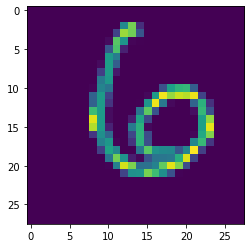

The number being tested is:  6


In [43]:
plt.imshow(X_test[100])
plt.show()
print("The number being tested is: ", y_test[100])

#### Test:

In [44]:
a = np.array([X_test[100]])
number = model.predict(a)
np.around(number)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [45]:
print("The predicted number is: ", np.argmax(model.predict(a)))

The predicted number is:  6


### Saving the model for future use

In [46]:
model.save('digit_recognizer.h5')